In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import csv
import matplotlib.pyplot as plt

# autoreload
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report

In [215]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [216]:
cardio = pd.read_csv('../data/Cardiovascular_cleaned.csv')
cardio.shape

(308854, 19)

In [217]:
cardio.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


# Takes binary (yes / no ) and changes them to 1=Yes and 0=No

In [218]:
# Map binary categorical variables to 0 and 1
binary_cols = ['Heart_Disease', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History']
cardio[binary_cols] = cardio[binary_cols].replace({'No': 0, 'Yes': 1})

# Confirm the encoding
print(cardio[binary_cols].head())

   Heart_Disease  Exercise  Skin_Cancer  Other_Cancer  Depression  Arthritis  \
0              0         0            0             0           0          1   
1              1         0            0             0           0          0   
2              0         1            0             0           0          0   
3              1         1            0             0           0          0   
4              0         0            0             0           0          0   

   Smoking_History  
0                1  
1                0  
2                0  
3                0  
4                1  


In [219]:
cardio.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,No,1,Female,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0,1,0,0,0,Yes,0,Female,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,1,0,0,0,0,Yes,0,Female,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,Poor,Within the past year,1,1,0,0,0,Yes,0,Male,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,Good,Within the past year,0,0,0,0,0,No,0,Male,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


# Changes Sex column to binary with Male=1 and Female=0

In [220]:
# Convert 'Female' and 'Male' in the 'Sex' column to 0 and 1, respectively
cardio['Sex'] = cardio['Sex'].replace({'Female': 0, 'Male': 1})

In [221]:
cardio.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,No,1,0,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0,1,0,0,0,Yes,0,0,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,1,0,0,0,0,Yes,0,0,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,Poor,Within the past year,1,1,0,0,0,Yes,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,Good,Within the past year,0,0,0,0,0,No,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [222]:
print(X.dtypes)

Exercise                                                 int64
Skin_Cancer                                              int64
Other_Cancer                                             int64
Depression                                               int64
Arthritis                                                int64
Height_(cm)                                            float64
Weight_(kg)                                            float64
BMI                                                    float64
Smoking_History                                          int64
Alcohol_Consumption                                    float64
Fruit_Consumption                                      float64
Green_Vegetables_Consumption                           float64
FriedPotato_Consumption                                float64
General_Health_Fair                                      uint8
General_Health_Good                                      uint8
General_Health_Poor                                    

# Changes columns General Health and Checkup from object to binary columns with get-dummies

In [223]:
# Apply one-hot encoding to 'General_Health' and 'Checkup' columns
cardio = pd.get_dummies(cardio, columns=['General_Health', 'Checkup', 'Diabetes'], drop_first=True)

# Verify the DataFrame after preprocessing
print(cardio.head())

   Exercise  Heart_Disease  Skin_Cancer  Other_Cancer  Depression  Arthritis  \
0         0              0            0             0           0          1   
1         0              1            0             0           0          0   
2         1              0            0             0           0          0   
3         1              1            0             0           0          0   
4         0              0            0             0           0          0   

   Sex Age_Category  Height_(cm)  Weight_(kg)  ...  General_Health_Good  \
0    0        70-74        150.0        32.66  ...                    0   
1    0        70-74        165.0        77.11  ...                    0   
2    0        60-64        163.0        88.45  ...                    0   
3    1        75-79        180.0        93.44  ...                    0   
4    1          80+        191.0        88.45  ...                    1   

   General_Health_Poor  General_Health_Very Good  Checkup_Never  \
0

In [224]:
Average_Age = []
for number in cardio['Age_Category']:
    if '-' in number:
        new = number.split('-')
        Average_Age.append((int(new[0]) + int(new[1])) / 2)
    else: 
        Average_Age.append(85)

In [225]:
cardio['Average_Age'] = Average_Age

In [226]:
cardio = cardio.drop(columns = 'Age_Category')


In [227]:
print(cardio.dtypes)

Exercise                                                 int64
Heart_Disease                                            int64
Skin_Cancer                                              int64
Other_Cancer                                             int64
Depression                                               int64
Arthritis                                                int64
Sex                                                      int64
Height_(cm)                                            float64
Weight_(kg)                                            float64
BMI                                                    float64
Smoking_History                                          int64
Alcohol_Consumption                                    float64
Fruit_Consumption                                      float64
Green_Vegetables_Consumption                           float64
FriedPotato_Consumption                                float64
General_Health_Fair                                    

array([[<Axes: title={'center': 'Exercise'}>,
        <Axes: title={'center': 'Heart_Disease'}>,
        <Axes: title={'center': 'Skin_Cancer'}>,
        <Axes: title={'center': 'Other_Cancer'}>,
        <Axes: title={'center': 'Depression'}>],
       [<Axes: title={'center': 'Arthritis'}>,
        <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoking_History'}>,
        <Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>,
        <Axes: title={'center': 'FriedPotato_Consumption'}>],
       [<Axes: title={'center': 'General_Health_Fair'}>,
        <Axes: title={'center': 'General_Health_Good'}>,
        <Axes: title={'center': 'General_Health_Poor'}>,
        <Axes: title={'center': 'General_Health_Very Good'}>,
 

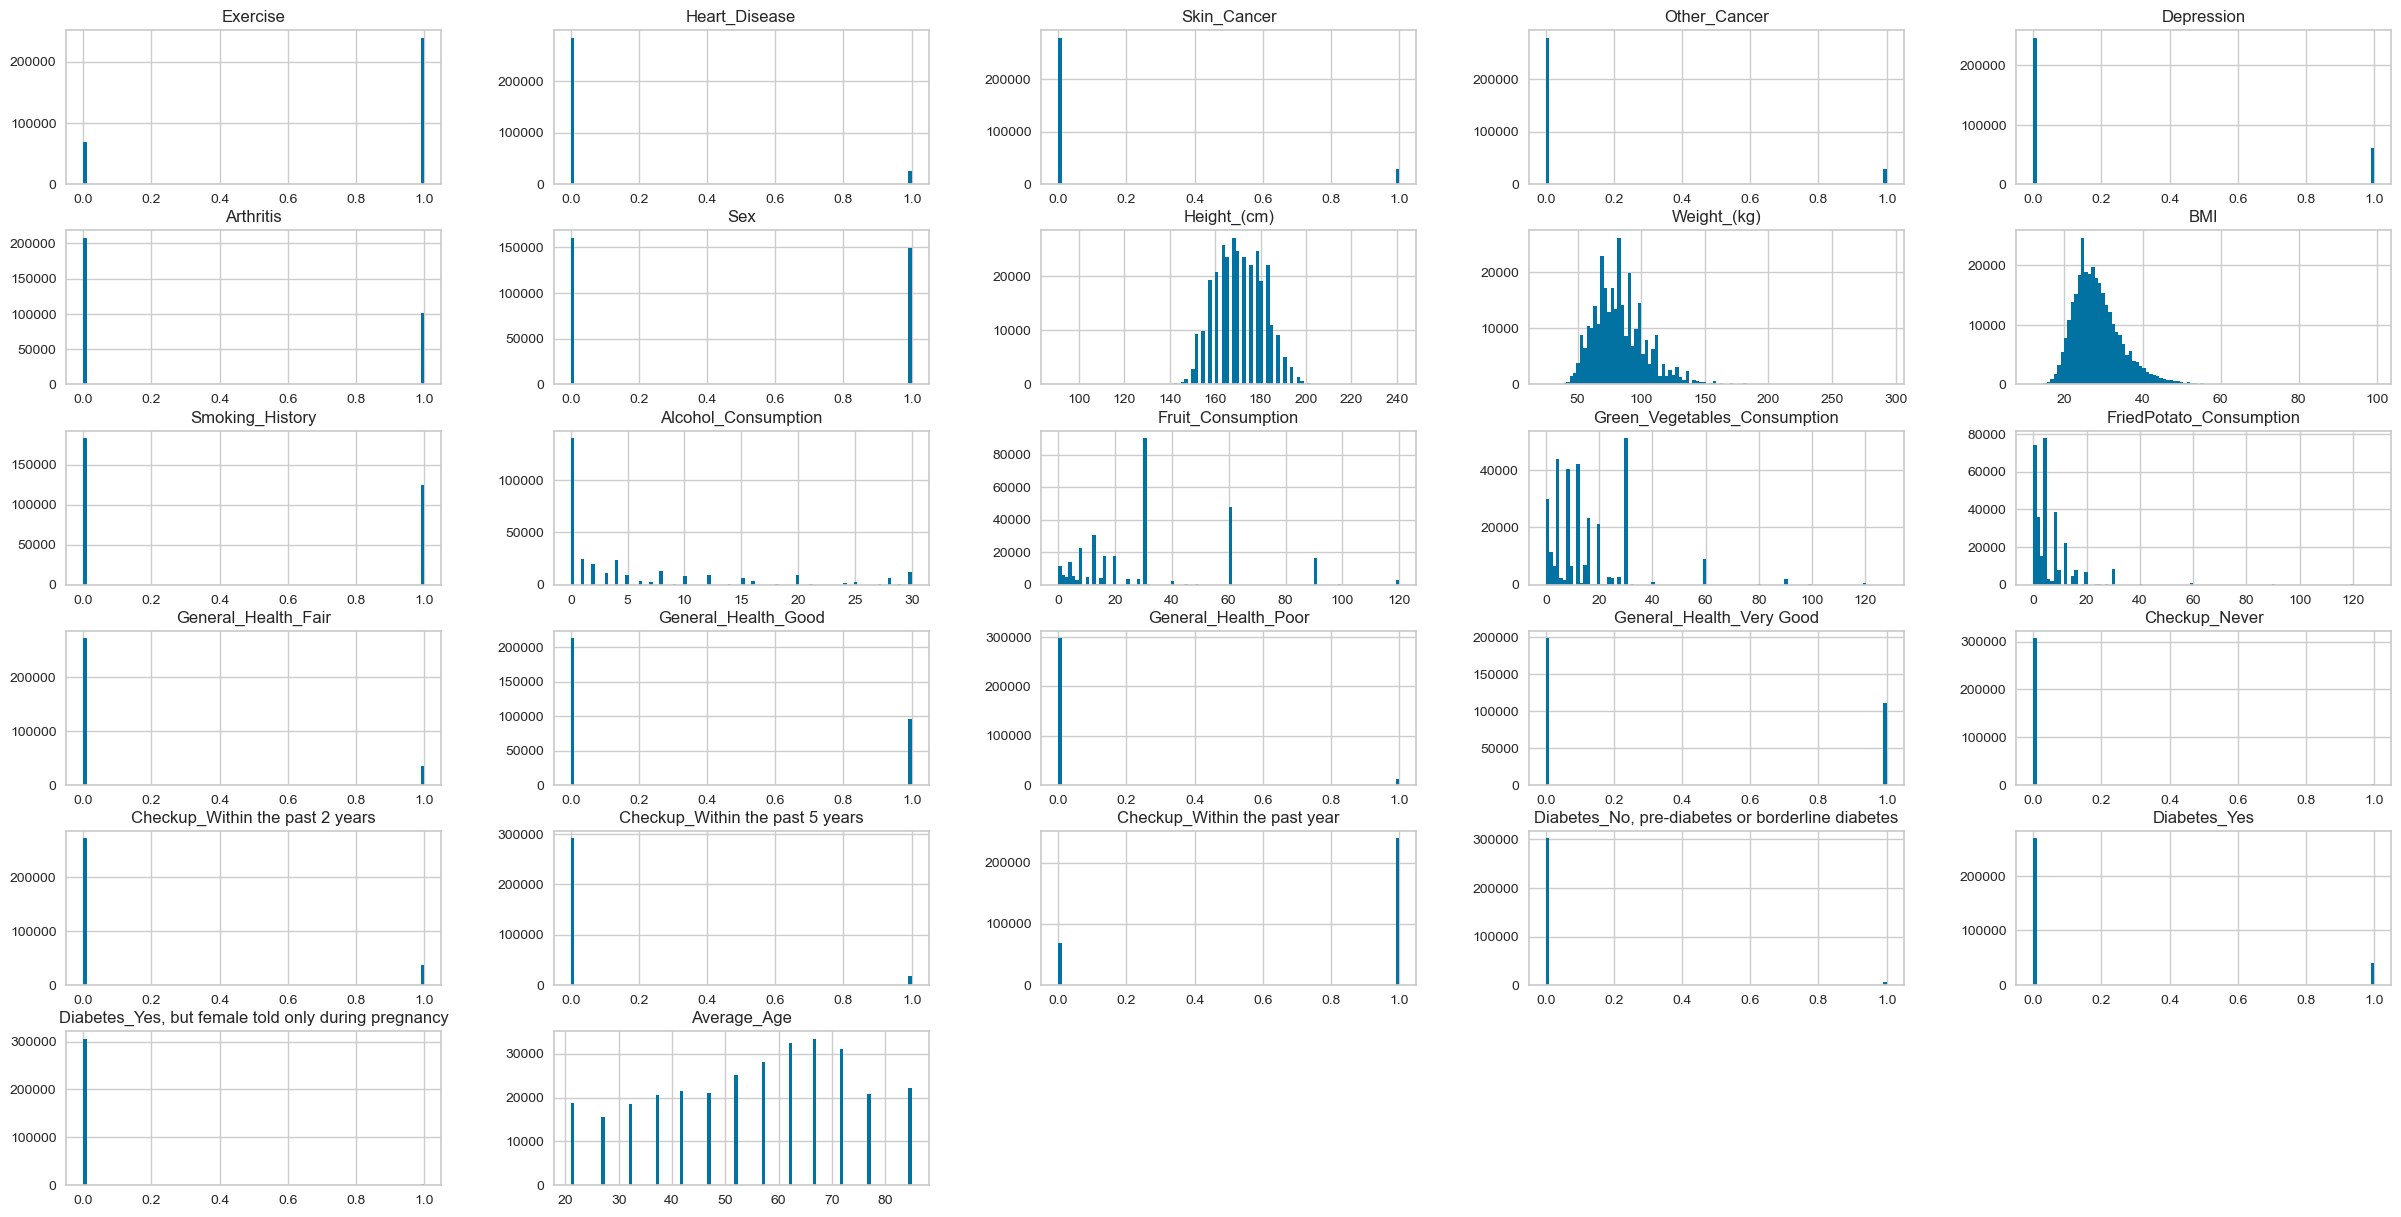

In [228]:
cardio.hist(bins=100, figsize = [30, 15])

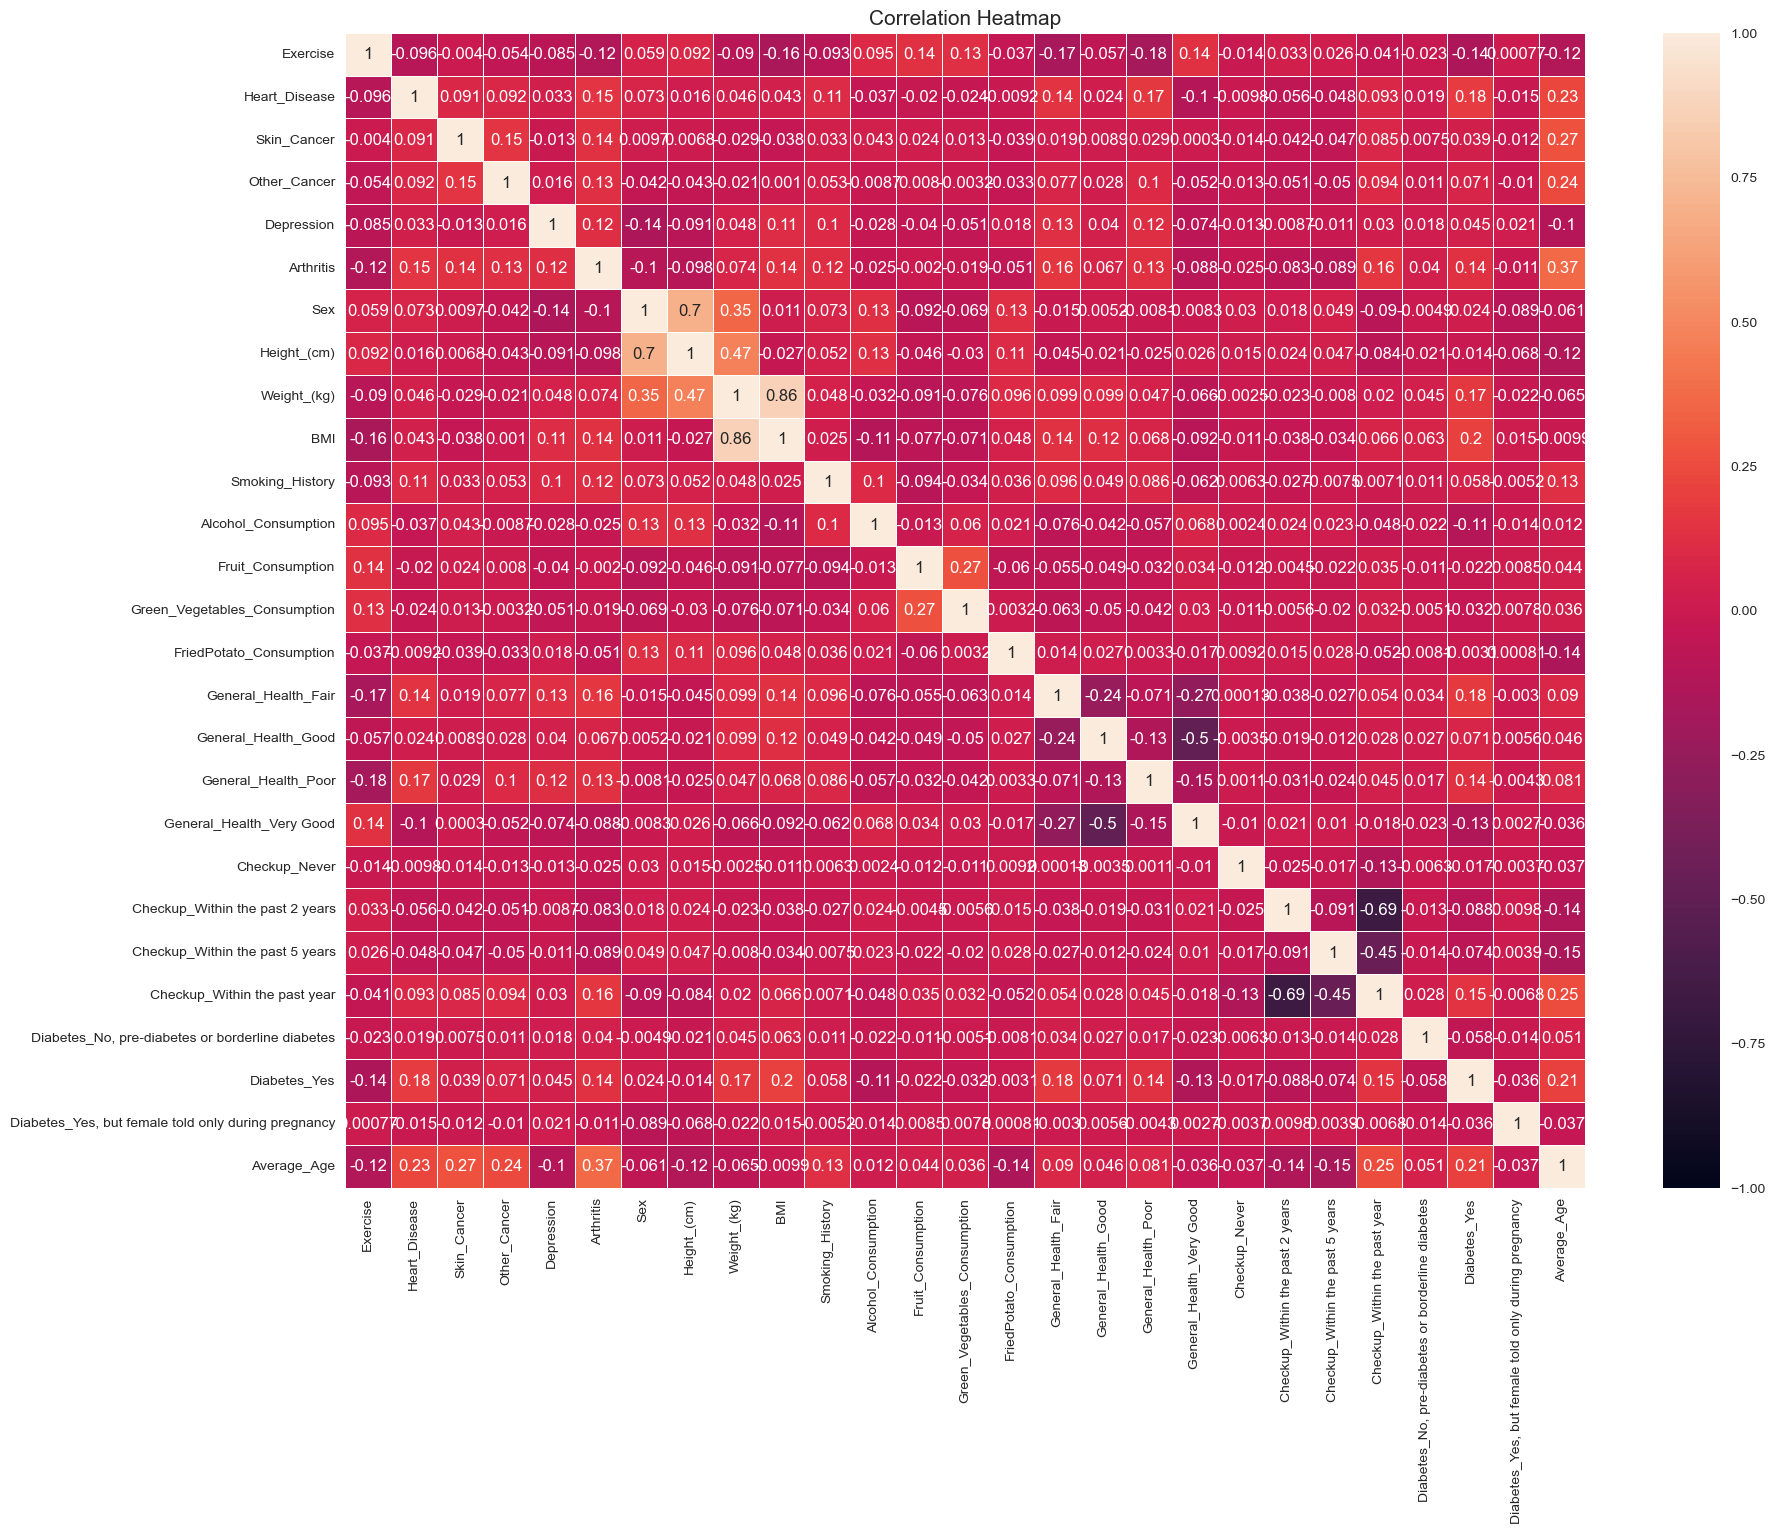

In [229]:
plt.figure(figsize = (20, 15))
sns.heatmap((cardio).corr(), annot = True, linewidths=.5, vmin = -1, vmax = 1)
plt.title('Correlation Heatmap', fontsize = 15)
plt.show()

In [230]:
# Welches T-Test
# scipy.stats.ttest_ind(a, b, equal_var=False)
scipy.stats.ttest_ind(a, b, equal_var=False)

NameError: name 'scipy' is not defined

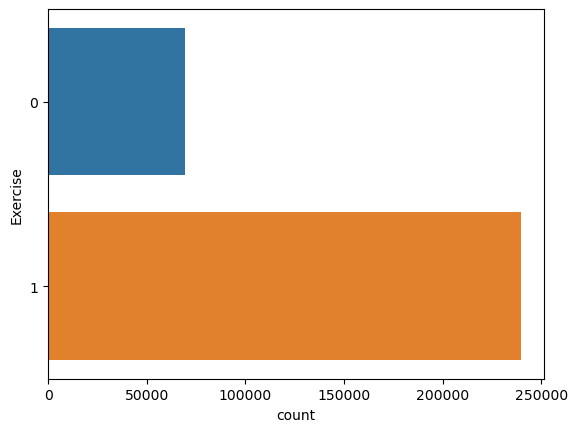

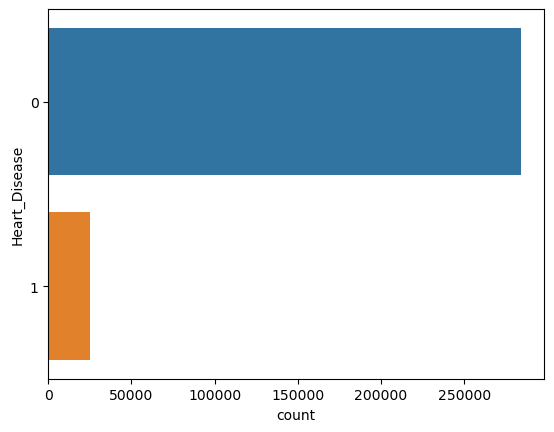

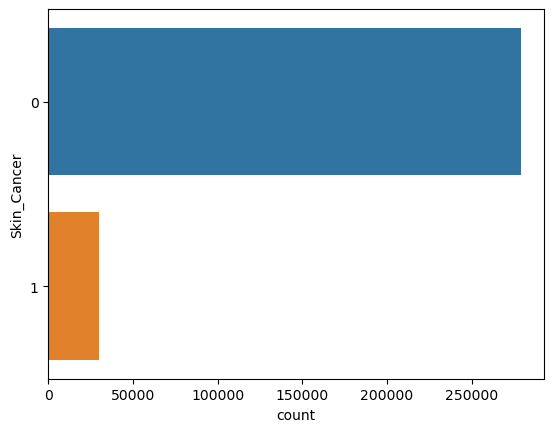

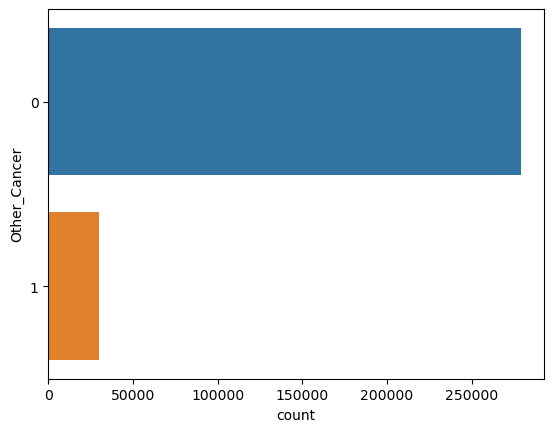

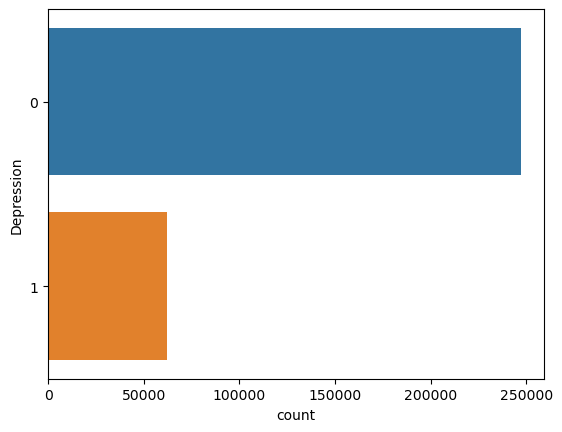

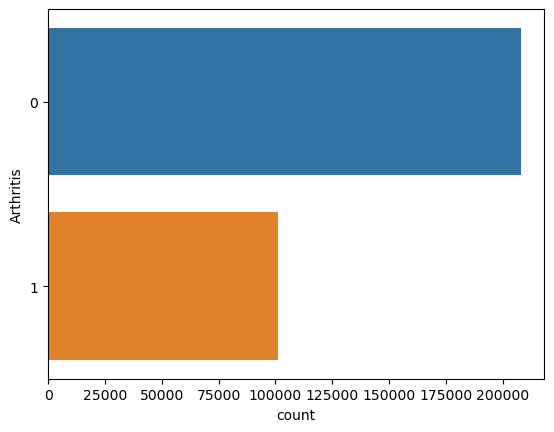

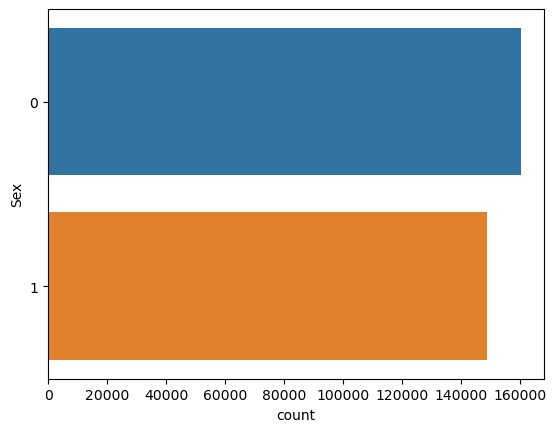

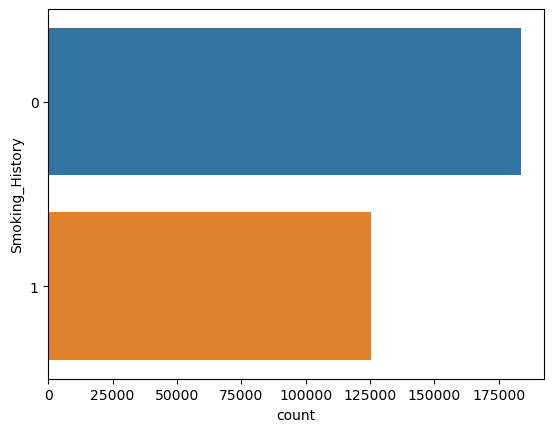

In [ ]:
for column in cardio.select_dtypes(include='int'):
    if cardio[column].nunique() > 1:
        sns.countplot(y=column, data=cardio)
        plt.show()

# Takes binary (yes / no ) and changes them to 1=Yes and 0=No

In [ ]:
print(X.dtypes)

const              float64
Exercise             int64
Skin_Cancer          int64
Other_Cancer         int64
Depression           int64
Diabetes            object
Arthritis            int64
Smoking_History      int64
Sex                  int64
dtype: object


In [ ]:
# Define the dependent variable (target) and independent variables (features)
y = cardio['Heart_Disease']  # Dependent variable
X = cardio.drop(columns=['Heart_Disease'])  # Independent variables

# Add an intercept term to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

# Display the summary of the regression results
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.221911
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Heart_Disease   No. Observations:               308854
Model:                          Logit   Df Residuals:                   308827
Method:                           MLE   Df Model:                           26
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:                  0.2098
Time:                        10:14:09   Log-Likelihood:                -68538.
converged:                       True   LL-Null:                       -86739.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                     

# Code for a confusion Matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming the DataFrame 'cardio' is already loaded

# Define the dependent variable (target) and independent variables (features)
y = cardio['Heart_Disease']  # Dependent variable
X = cardio.drop(columns=['Heart_Disease'])  # Independent variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logit_model.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
[[56467   307]
 [ 4689   308]]
Accuracy: 0.92


Confusion Matrix:
[[TN  FP]
 [FN  TP]]

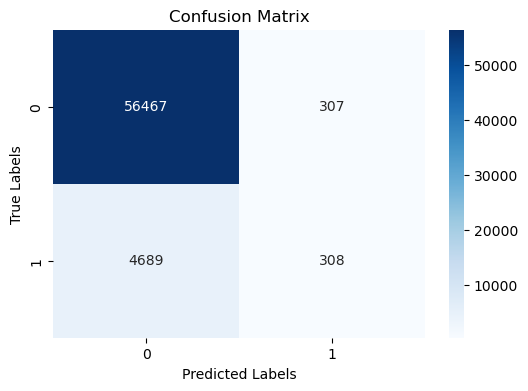

Accuracy: 0.92


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Define the dependent variable (target) and independent variables (features)
y = cardio['Heart_Disease']  # Dependent variable
X = cardio.drop(columns=['Heart_Disease'])  # Independent variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logit_model.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# [TN, FP]
# [FN, TP]

# Confusion Matrix meaning
## TN: True Negative (correctly predicted negative cases)
## FP: False Positive (incorrectly predicted positive cases)
## FN: False Negative (incorrectly predicted negative cases)
## TP: True Positive (correctly predicted positive cases)

# ROC Curve

# K Folds

# The whole thing w/K Folds

ROC-AUC scores for each fold:
[0.83233273 0.83238784 0.82181489 0.82940839 0.82097886]

Average ROC-AUC: 0.83 (±0.01)

ROC-AUC on Testing Data: 0.83

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56774
           1       0.50      0.06      0.11      4997

    accuracy                           0.92     61771
   macro avg       0.71      0.53      0.53     61771
weighted avg       0.89      0.92      0.89     61771



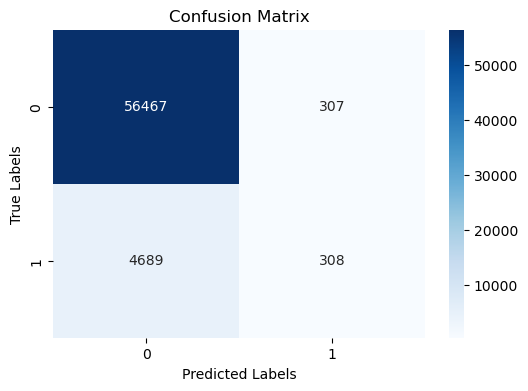

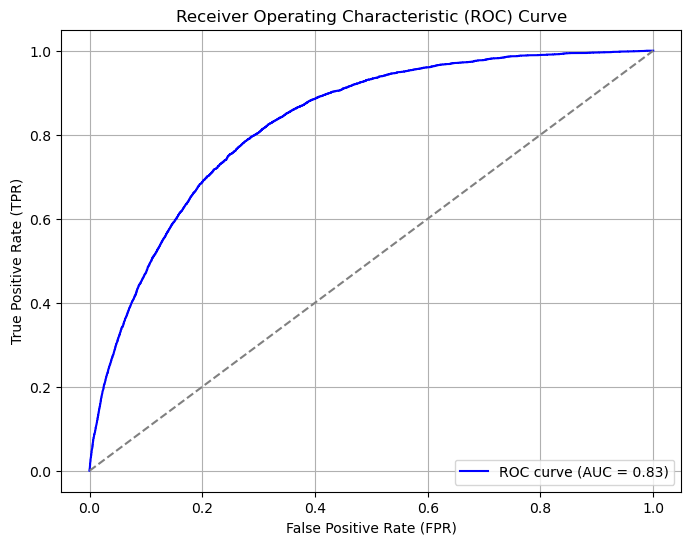

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


# Define the dependent variable (target) and independent variables (features)
y = cardio['Heart_Disease']  # Dependent variable
X = cardio.drop(columns=['Heart_Disease'])  # Independent variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create the logistic regression model
logit_model = LogisticRegression()

# Train the logistic regression model on the training data
logit_model.fit(X_train, y_train)

# Perform k-fold cross-validation (let's say k=5)
k_folds = 5
scores = cross_val_score(logit_model, X_train, y_train, cv=k_folds, scoring='roc_auc')

# Print the performance metrics for each fold
print("ROC-AUC scores for each fold:")
print(scores)

# Calculate and print the average and standard deviation of the ROC-AUC scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"\nAverage ROC-AUC: {mean_score:.2f} (±{std_score:.2f})")

# Make predictions on the testing data using the trained model
y_pred = logit_model.predict(X_test)
y_pred_proba = logit_model.predict_proba(X_test)[:, 1]

# Evaluate the model's performance on the testing data using multiple metrics
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC on Testing Data: {test_roc_auc:.2f}")

# Get the classification report with multiple scores (precision, recall, F1-score, support)
print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_pred))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


ROC-AUC scores for each fold:
[0.82702962 0.83344544 0.83332912 0.83116106 0.82372341 0.82659699
 0.82879237 0.82995706 0.82125488 0.82075997]

Average ROC-AUC: 0.83 (±0.00)

ROC-AUC on Testing Data: 0.83

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56774
           1       0.50      0.06      0.11      4997

    accuracy                           0.92     61771
   macro avg       0.71      0.53      0.53     61771
weighted avg       0.89      0.92      0.89     61771



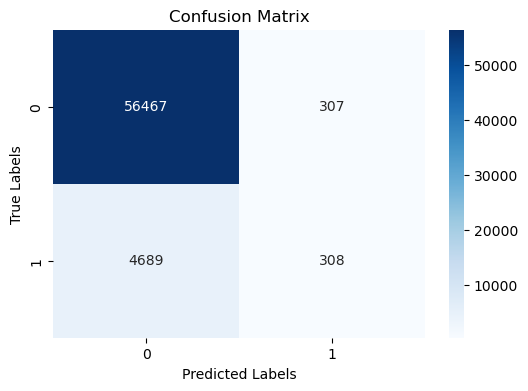

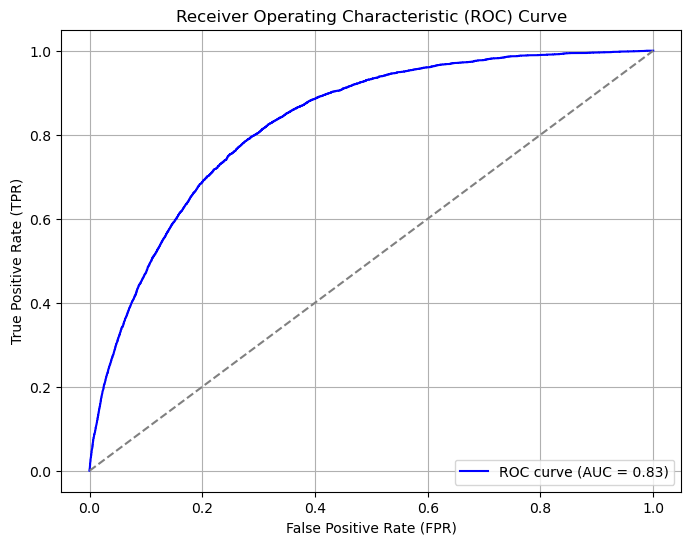

In [ ]:
# Define the dependent variable (target) and independent variables (features)
y = cardio['Heart_Disease']  # Dependent variable
X = cardio.drop(columns=['Heart_Disease'])  # Independent variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
logit_model = LogisticRegression()

# Train the logistic regression model on the training data
logit_model.fit(X_train, y_train)

# Perform k-fold cross-validation (let's say k=5)
k_folds = 10
scores = cross_val_score(logit_model, X_train, y_train, cv=k_folds, scoring='roc_auc')

# Print the performance metrics for each fold
print("ROC-AUC scores for each fold:")
print(scores)

# Calculate and print the average and standard deviation of the ROC-AUC scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"\nAverage ROC-AUC: {mean_score:.2f} (±{std_score:.2f})")

# Make predictions on the testing data using the trained model
y_pred = logit_model.predict(X_test)
y_pred_proba = logit_model.predict_proba(X_test)[:, 1]

# Evaluate the model's performance on the testing data using multiple metrics
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC on Testing Data: {test_roc_auc:.2f}")

# Get the classification report with multiple scores (precision, recall, F1-score, support)
print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_pred))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


ROC-AUC scores for each fold:
[0.83581631 0.83996173 0.84231169 0.83711969 0.83089107 0.83413619
 0.83713457 0.8360213  0.82781566 0.82695681]

Average ROC-AUC: 0.83 (±0.00)

ROC-AUC on Testing Data: 0.84

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56774
           1       0.50      0.07      0.12      4997

    accuracy                           0.92     61771
   macro avg       0.71      0.53      0.54     61771
weighted avg       0.89      0.92      0.89     61771



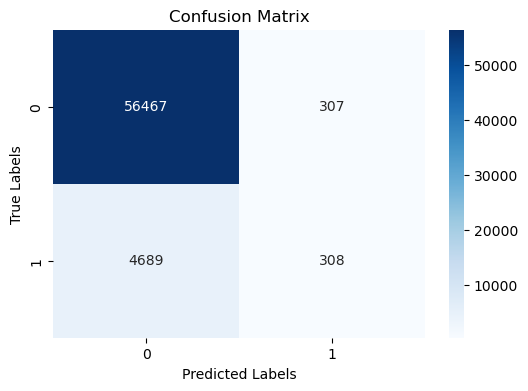

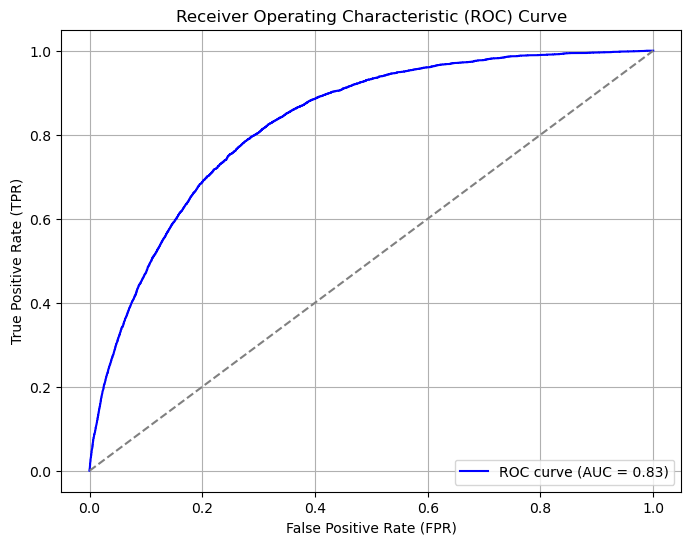

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report


# Split the data into features (X) and target (y)
X = cardio.drop(columns=['Heart_Disease'])
y = cardio['Heart_Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Perform k-fold cross-validation with 10 folds
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=10, scoring='roc_auc')

# Calculate the average ROC-AUC score
average_roc_auc = np.mean(cv_scores)

# Predict on the test set and calculate ROC-AUC score for testing data
y_pred = logreg.predict_proba(X_test_scaled)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred)

# Print the results
print("ROC-AUC scores for each fold:")
print(cv_scores)
print("\nAverage ROC-AUC: {:.2f} (±{:.2f})".format(average_roc_auc, np.std(cv_scores)))
print("\nROC-AUC on Testing Data: {:.2f}".format(roc_auc_test))

# Print the classification report on testing data
y_pred_binary = (y_pred >= 0.50).astype(int) # changed from 0.5
print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_pred_binary))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




# With Box plots and bar graphs

ROC-AUC scores for each fold:
[0.83581631 0.83996173 0.84231169 0.83711969 0.83089107 0.83413619
 0.83713457 0.8360213  0.82781566 0.82695681]

Average ROC-AUC: 0.83 (±0.00)

ROC-AUC on Testing Data: 0.84

Classification Report on Testing Data:
              precision    recall  f1-score       support
0              0.923690  0.994170  0.957635  56774.000000
1              0.502256  0.066840  0.117980   4997.000000
accuracy       0.919153  0.919153  0.919153      0.919153
macro avg      0.712973  0.530505  0.537807  61771.000000
weighted avg   0.889598  0.919153  0.889710  61771.000000


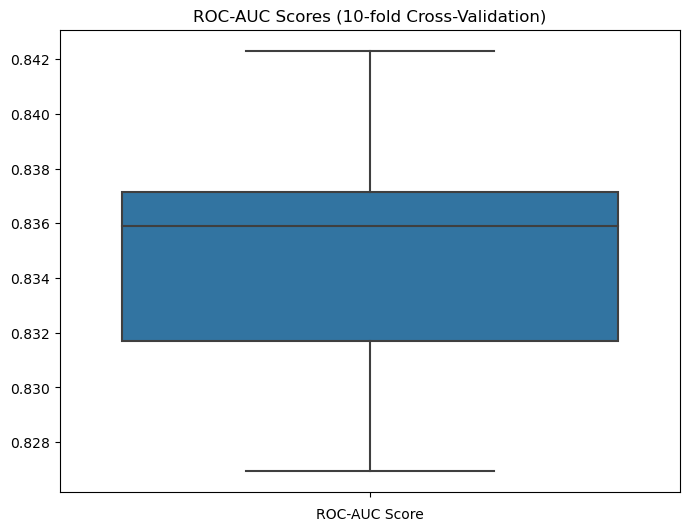

<Figure size 800x600 with 0 Axes>

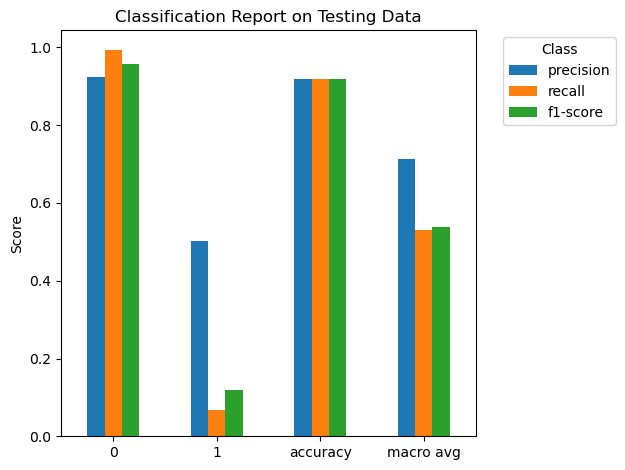

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report

# Assuming you have already loaded and preprocessed the dataframe 'cardio'
# Split the data into features (X) and target (y)
X = cardio.drop(columns=['Heart_Disease'])
y = cardio['Heart_Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Perform k-fold cross-validation with 10 folds
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=10, scoring='roc_auc')

# Calculate the average ROC-AUC score
average_roc_auc = np.mean(cv_scores)

# Predict on the test set and calculate ROC-AUC score for testing data
y_pred = logreg.predict_proba(X_test_scaled)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred)

# Classification report on testing data
y_pred_binary = (y_pred >= 0.5).astype(int)
classification_report_data = classification_report(y_test, y_pred_binary, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_data).transpose()

# Print the results
print("ROC-AUC scores for each fold:")
print(cv_scores)
print("\nAverage ROC-AUC: {:.2f} (±{:.2f})".format(average_roc_auc, np.std(cv_scores)))
print("\nROC-AUC on Testing Data: {:.2f}".format(roc_auc_test))
print("\nClassification Report on Testing Data:")
print(classification_report_df)

# Box plot for ROC-AUC scores
plt.figure(figsize=(8, 6))
sns.boxplot(y=cv_scores)
plt.title("ROC-AUC Scores (10-fold Cross-Validation)")
plt.xlabel("ROC-AUC Score")
plt.show()

# Bar graph for precision, recall, and f1-score
plt.figure(figsize=(8, 6))
classification_report_df.iloc[:-1, :-1].plot(kind='bar', rot=0)
plt.title("Classification Report on Testing Data")
plt.ylabel("Score")
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Feature Selection

Optimization terminated successfully.
         Current function value: 0.222279
         Iterations 8
                                                                                              Feature  \
General_Health_Poor                                                               General_Health_Poor   
General_Health_Fair                                                               General_Health_Fair   
General_Health_Good                                                               General_Health_Good   
Sex                                                                                               Sex   
Diabetes_Yes                                                                             Diabetes_Yes   
General_Health_Very Good                                                     General_Health_Very Good   
Checkup_Within the past year                                             Checkup_Within the past year   
Smoking_History                                           

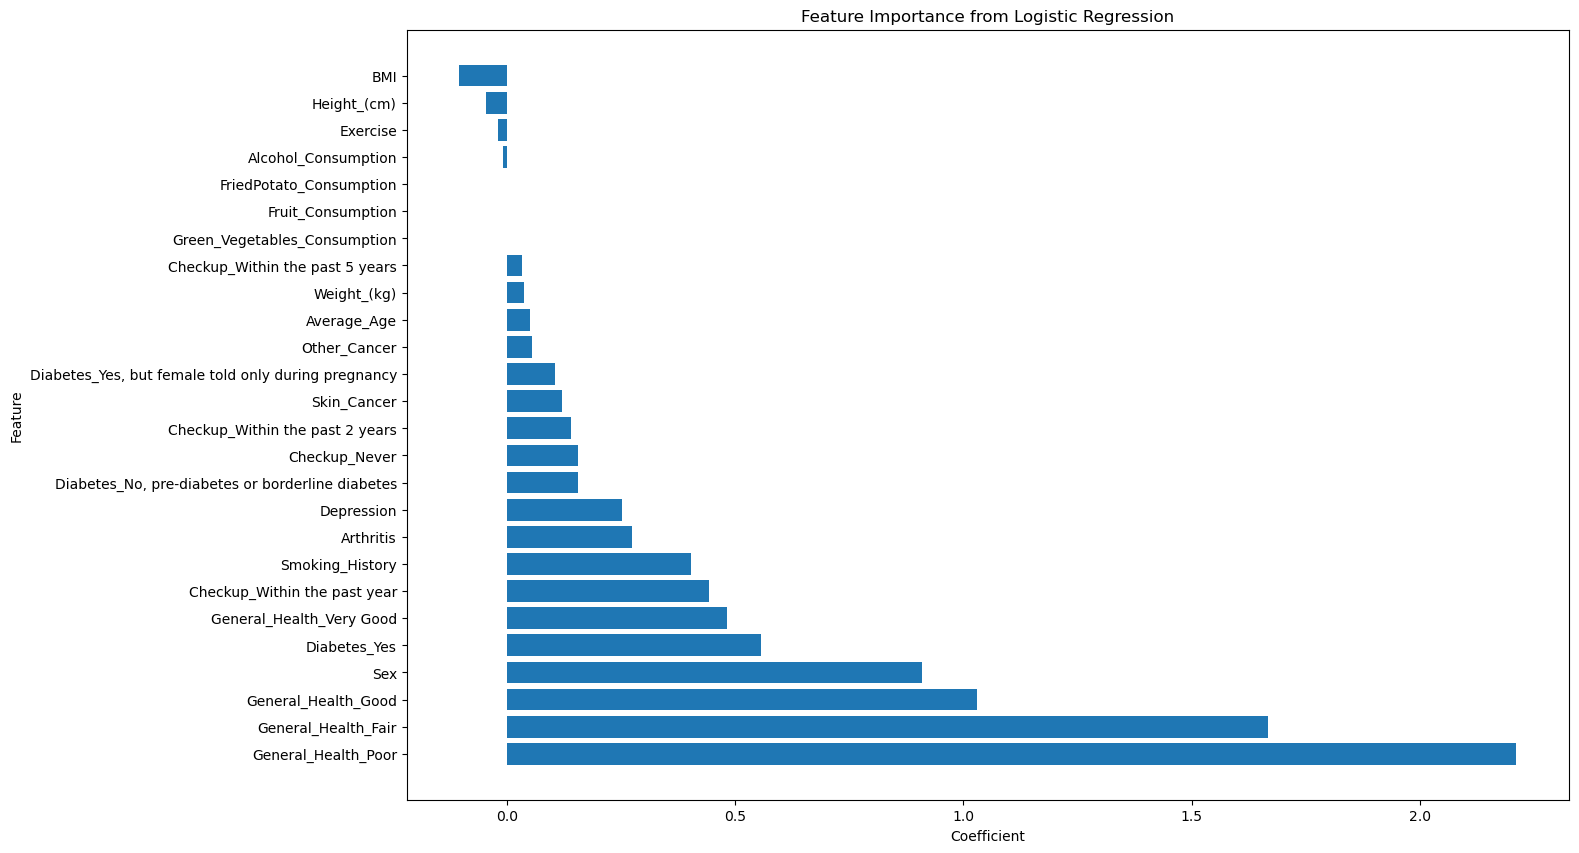

In [ ]:
# Fit the logistic regression model
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

# Get the feature importance from the model
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': logit_result.params})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print(feature_importance)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.show()



# Hyperparameter tuning testing and results

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression



# Preprocess the data and split into features (X) and target (y)
X = cardio.drop(columns=['Heart_Disease'])
y = cardio['Heart_Disease']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength values
    'penalty': ['l1', 'l2']        # Penalty type (L1 or L2)
}

# Create the grid search object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
test_score = best_model.score(X_test, y_test)

# Print the results
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_score)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Test Accuracy: 0.9190396788136828


# Hyperparameter added to main code

ROC-AUC scores for each fold:
[0.83581631 0.83996173 0.84231169 0.83711969 0.83089107 0.83413619
 0.83713457 0.8360213  0.82781566 0.82695681]

Average ROC-AUC: 0.83 (±0.00)

ROC-AUC on Testing Data: 0.84

Classification Report on Testing Data:
              precision    recall  f1-score       support
0              0.923690  0.994170  0.957635  56774.000000
1              0.502256  0.066840  0.117980   4997.000000
accuracy       0.919153  0.919153  0.919153      0.919153
macro avg      0.712973  0.530505  0.537807  61771.000000
weighted avg   0.889598  0.919153  0.889710  61771.000000


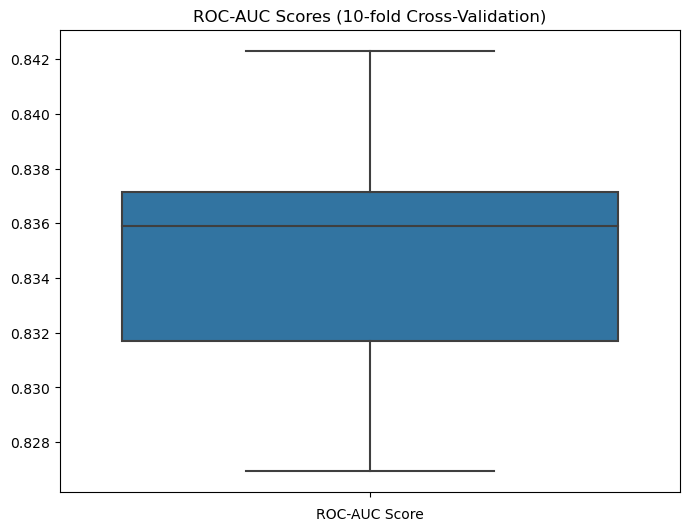

<Figure size 800x600 with 0 Axes>

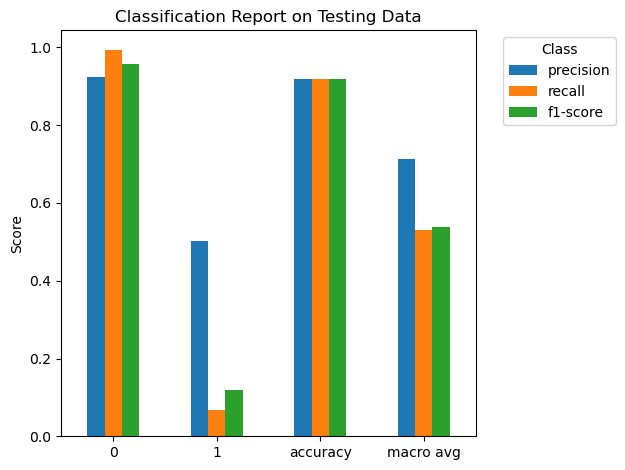

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Test Accuracy with Best Model: 0.8349133701338085

ROC-AUC on Testing Data with Best Model: 0.84

Classification Report on Testing Data with Best Model:
              precision    recall  f1-score       support
0              0.923641  0.994328  0.957682  56774.000000
1              0.506135  0.066040  0.116835   4997.000000
accuracy       0.919234  0.919234  0.919234      0.919234
macro avg      0.714888  0.530184  0.537258  61771.000000
weighted avg   0.889866  0.919234  0.889661  61771.000000


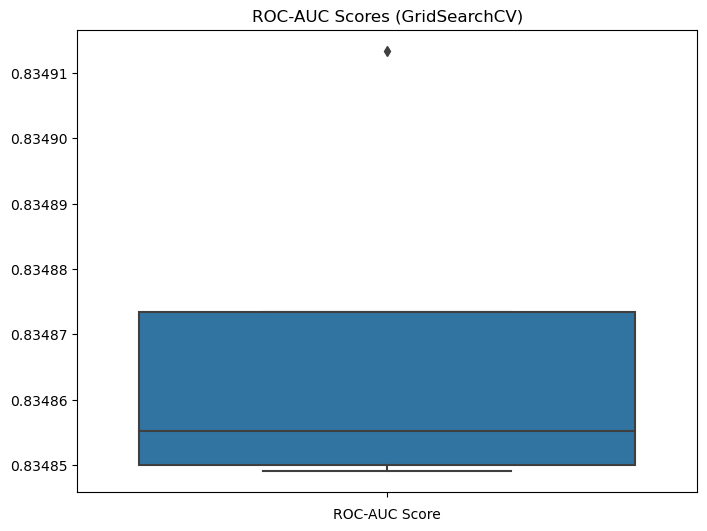

<Figure size 800x600 with 0 Axes>

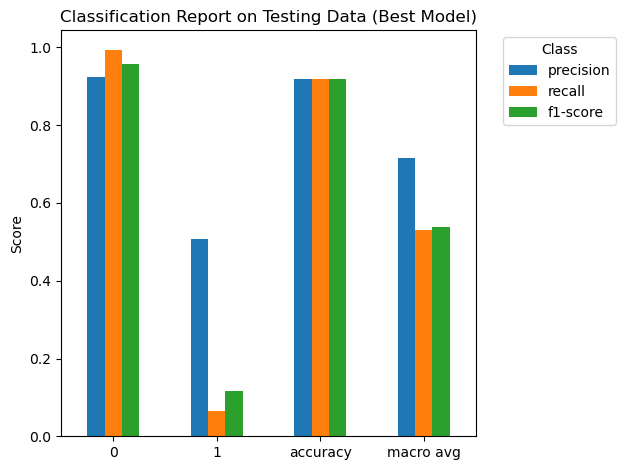

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

X = cardio.drop(columns=['Heart_Disease'])
y = cardio['Heart_Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Perform k-fold cross-validation with 10 folds
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=10, scoring='roc_auc')

# Calculate the average ROC-AUC score
average_roc_auc = np.mean(cv_scores)

# Predict on the test set and calculate ROC-AUC score for testing data
y_pred = logreg.predict_proba(X_test_scaled)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred)

# Classification report on testing data
y_pred_binary = (y_pred >= 0.5).astype(int)
classification_report_data = classification_report(y_test, y_pred_binary, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_data).transpose()

# Print the results
print("ROC-AUC scores for each fold:")
print(cv_scores)
print("\nAverage ROC-AUC: {:.2f} (±{:.2f})".format(average_roc_auc, np.std(cv_scores)))
print("\nROC-AUC on Testing Data: {:.2f}".format(roc_auc_test))
print("\nClassification Report on Testing Data:")
print(classification_report_df)

# Box plot for ROC-AUC scores
plt.figure(figsize=(8, 6))
sns.boxplot(y=cv_scores)
plt.title("ROC-AUC Scores (10-fold Cross-Validation)")
plt.xlabel("ROC-AUC Score")
plt.show()

# Bar graph for precision, recall, and f1-score
plt.figure(figsize=(8, 6))
classification_report_df.iloc[:-1, :-1].plot(kind='bar', rot=0)
plt.title("Classification Report on Testing Data")
plt.ylabel("Score")
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Hyperparameter tuning using GridSearchCV
hyperparameter_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Initialize logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(logreg_model, hyperparameter_grid, cv=5, scoring='roc_auc')

# Fit GridSearchCV on training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model with the best hyperparameters
best_logreg_model = grid_search.best_estimator_

# Predict on the test set and calculate ROC-AUC score for testing data using the best model
y_pred_best = best_logreg_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_test_best = roc_auc_score(y_test, y_pred_best)

# Classification report on testing data with the best model
y_pred_binary_best = (y_pred_best >= 0.5).astype(int)
classification_report_data_best = classification_report(y_test, y_pred_binary_best, output_dict=True)
classification_report_df_best = pd.DataFrame(classification_report_data_best).transpose()

# Print the results with the best model
print("Best Hyperparameters:", grid_search.best_params_)
print("Test Accuracy with Best Model:", grid_search.best_score_)
print("\nROC-AUC on Testing Data with Best Model: {:.2f}".format(roc_auc_test_best))
print("\nClassification Report on Testing Data with Best Model:")
print(classification_report_df_best)

# ... (Remaining code for box plot and bar graph)

# Box plot for ROC-AUC scores of the best model
plt.figure(figsize=(8, 6))
sns.boxplot(y=grid_search.cv_results_['mean_test_score'])
plt.title("ROC-AUC Scores (GridSearchCV)")
plt.xlabel("ROC-AUC Score")
plt.show()

# Bar graph for precision, recall, and f1-score of the best model
plt.figure(figsize=(8, 6))
classification_report_df_best.iloc[:-1, :-1].plot(kind='bar', rot=0)
plt.title("Classification Report on Testing Data (Best Model)")
plt.ylabel("Score")
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Interpreting the coefficients of the logistic regression

Average_Age: 0.9387
General_Health_Fair: 0.5421
General_Health_Good: 0.4852
Sex: 0.4211
General_Health_Poor: 0.4199
General_Health_Very Good: 0.2406
Checkup_Within the past year: 0.2190
Smoking_History: 0.1944
Diabetes_Yes: 0.1827
Arthritis: 0.1253
Depression: 0.1027
Alcohol_Consumption: -0.0748
Checkup_Within the past 2 years: 0.0653
BMI: 0.0561
Weight_(kg): -0.0419
Skin_Cancer: 0.0278
Diabetes_No, pre-diabetes or borderline diabetes: 0.0218
Height_(cm): -0.0202
Checkup_Within the past 5 years: 0.0191
Green_Vegetables_Consumption: 0.0140
Other_Cancer: 0.0121
Checkup_Never: 0.0118
Exercise: -0.0096
FriedPotato_Consumption: -0.0085
Diabetes_Yes, but female told only during pregnancy: 0.0070
Fruit_Consumption: 0.0017


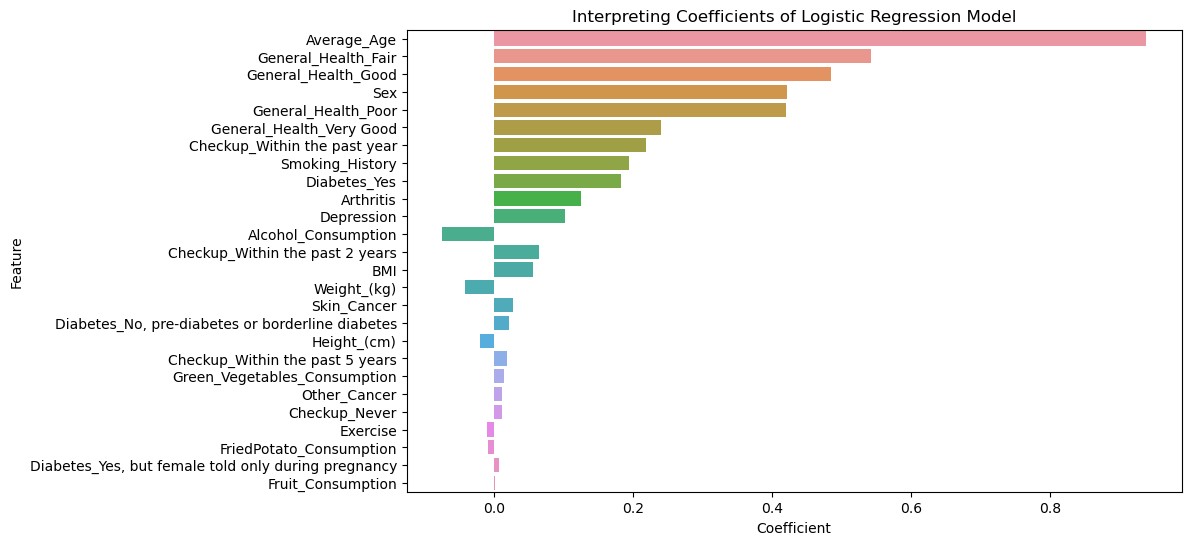

In [ ]:
# Get the coefficients and corresponding feature names
coefficients = logreg.coef_[0]
feature_names = X.columns

# Create a DataFrame to display the coefficients and their interpretation
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to highlight the most important features
coeff_df['Abs_Coefficient'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False).reset_index(drop=True)

# Print the interpretation of the coefficients
for index, row in coeff_df.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:.4f}")

# Optionally, you can plot the coefficients to visualize their magnitudes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, orient='h')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Interpreting Coefficients of Logistic Regression Model')
plt.show()


# From Ben

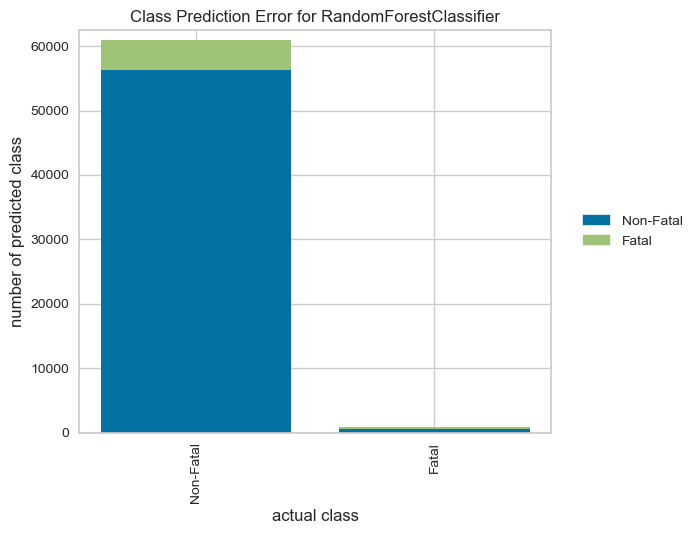

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
classes = ['Non-Fatal', 'Fatal']
visualizer = ClassPredictionError(
    RandomForestClassifier(random_state=42, n_estimators=10), classes=classes
)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.show()

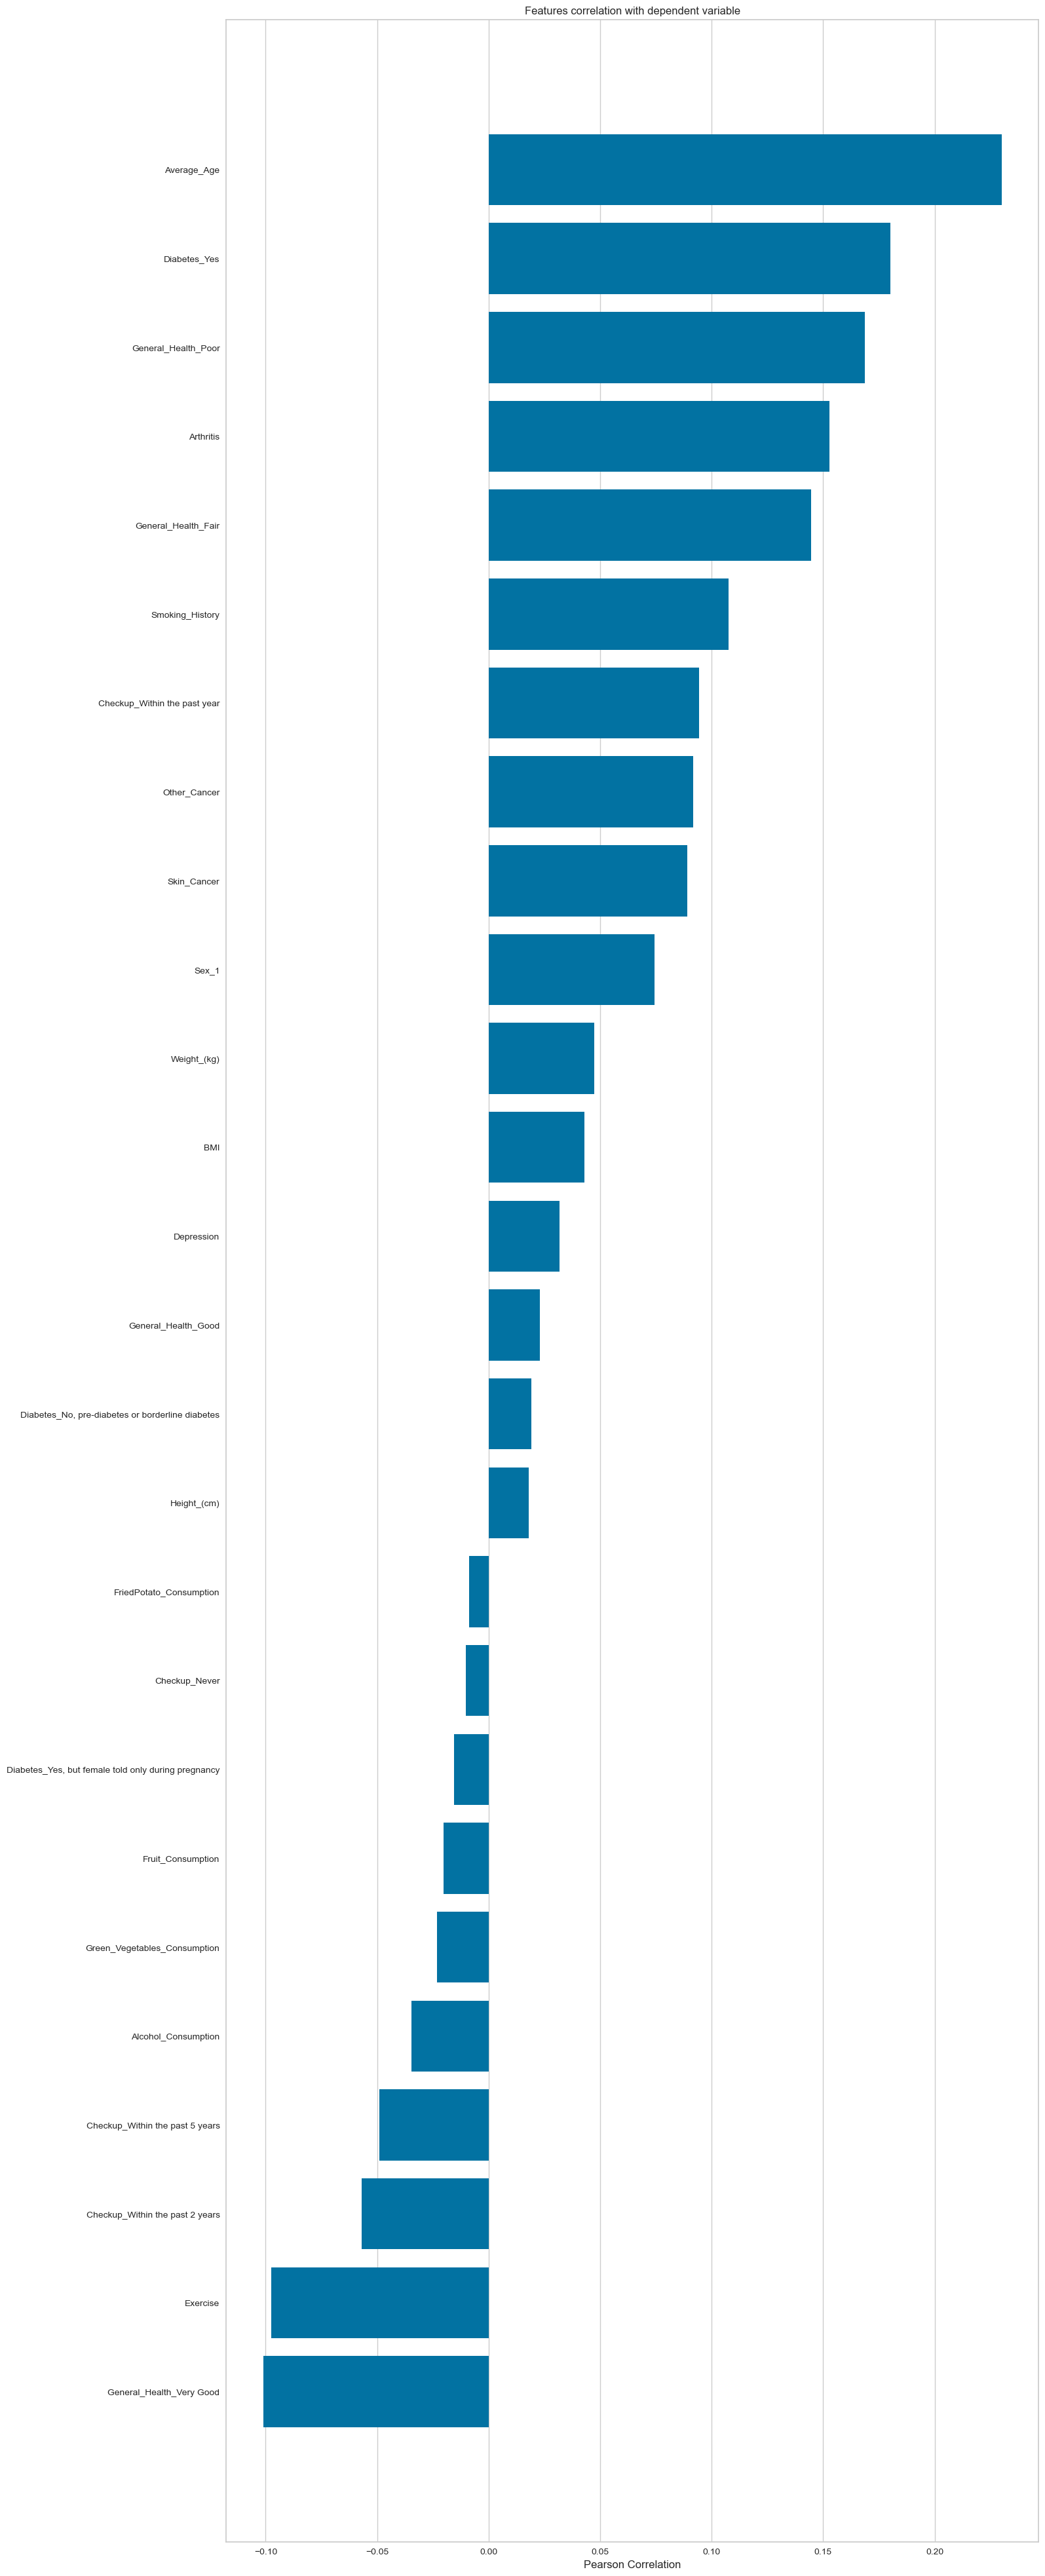

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
from yellowbrick.target import FeatureCorrelation
fig, ax = plt.subplots(figsize= (16, 50))
viz = FeatureCorrelation(sort= True)
viz.fit(X_train, y_train)
viz.show()

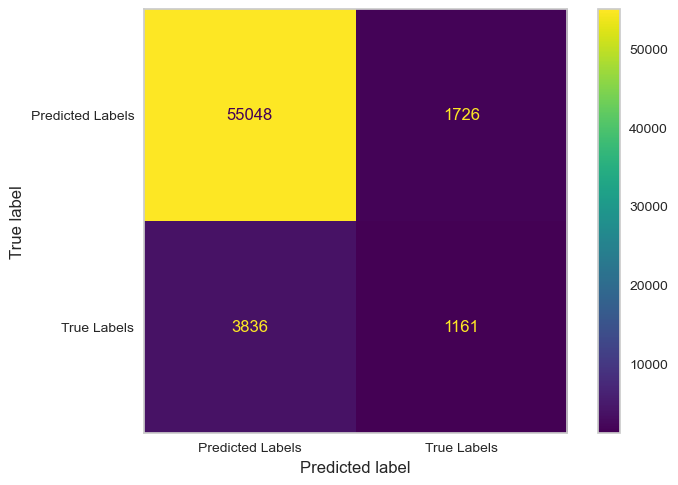

In [231]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#change label value to match your target categories.  0 is first
labels= ['Predicted Labels', 'True Labels']
#change threshold to tweak how the model predicts.
threshold = 0.32
y_pred = logreg.predict_proba(X_test_scaled)[:, 1] > threshold
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.grid(None)
plt.show()

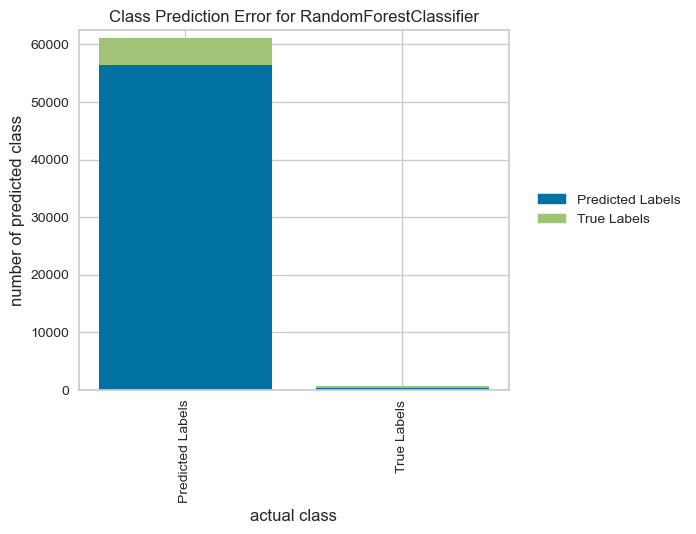

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [232]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
classes = ['Predicted Labels', 'True Labels']
visualizer = ClassPredictionError(
    RandomForestClassifier(random_state=42, n_estimators=20), classes=classes
)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.show()

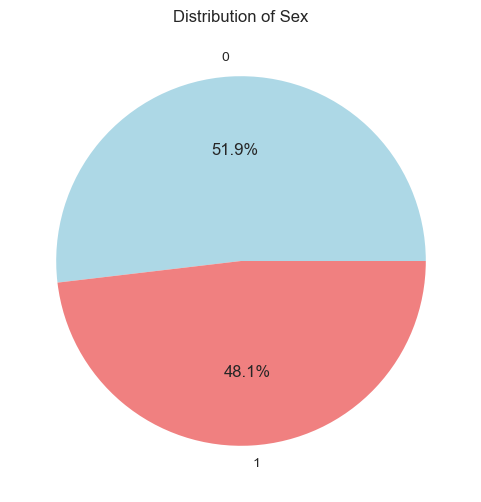

In [233]:
# Example: Plotting a pie chart of 'Sex' distribution
plt.figure(figsize=(6, 6))
cardio['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Distribution of Sex")
plt.ylabel('')
plt.show()

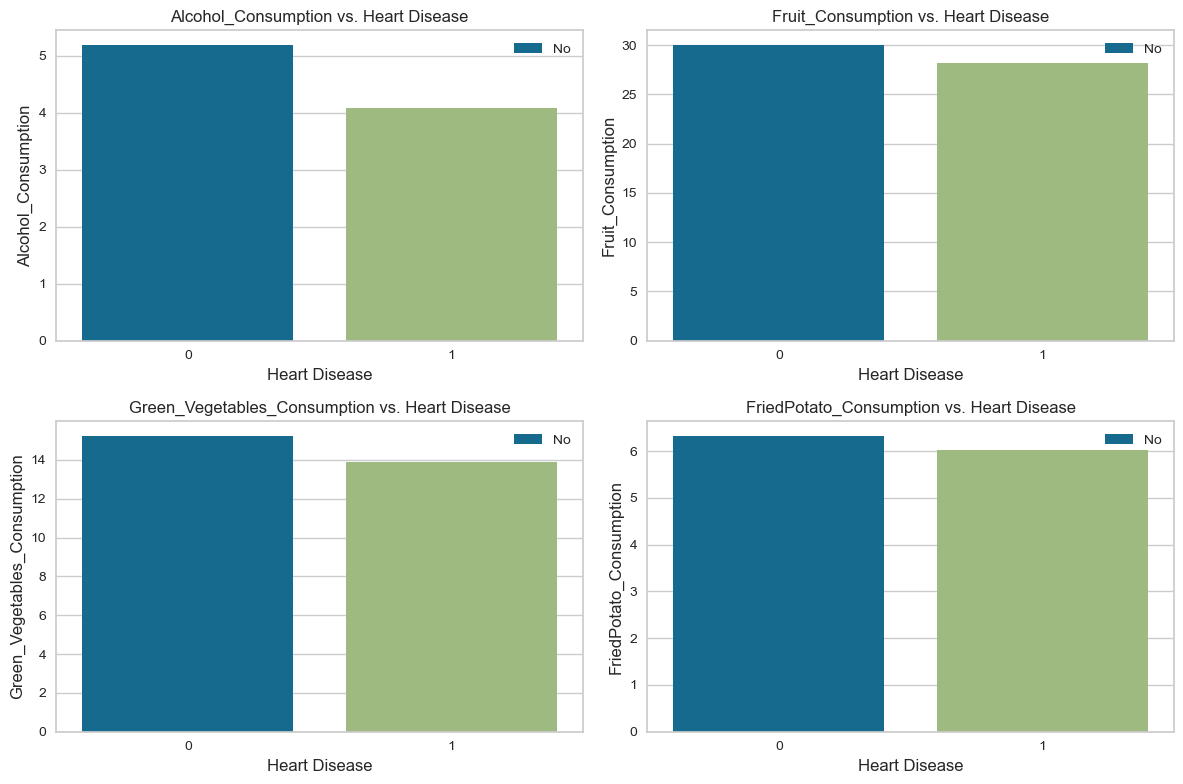

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns you want to compare
columns = ['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
category_labels = ["No", "Yes"]

# Plot bar plots for each column
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=cardio, x='Heart_Disease', y=col, ci=None)
    plt.title(f"{col} vs. Heart Disease")
    plt.xlabel("Heart Disease")
    plt.ylabel(col)
    plt.legend(labels=category_labels)

plt.tight_layout()
plt.show()


